The article is primarily focused on ETFs and financial investment strategies, with a neutral tone that suggests an analytical, informational piece

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data..

Average Sentiment Scores:
Positive: 0.11
Neutral: 0.85
Negative: 0.04
Compound: 0.25
Most Common Words After Stopwords Removal:
,: 136
.: 100
ETF: 60
Income: 48
Stone: 46
Ridge: 46
investment: 31
’: 30
Longevity: 29
ETFs: 26
Average Sentiment Scores:
Positive: 0.11
Neutral: 0.85
Negative: 0.04
Compound: 0.25


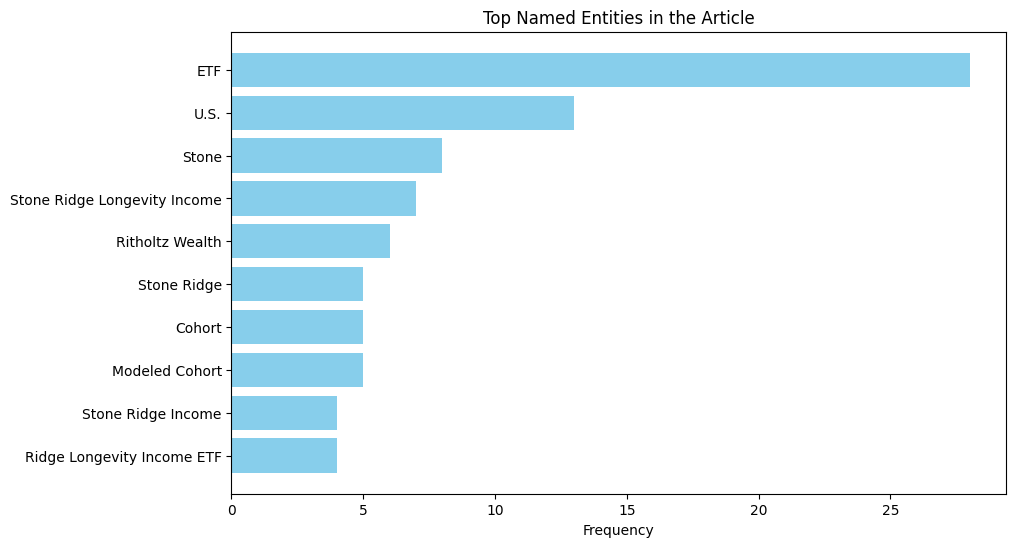

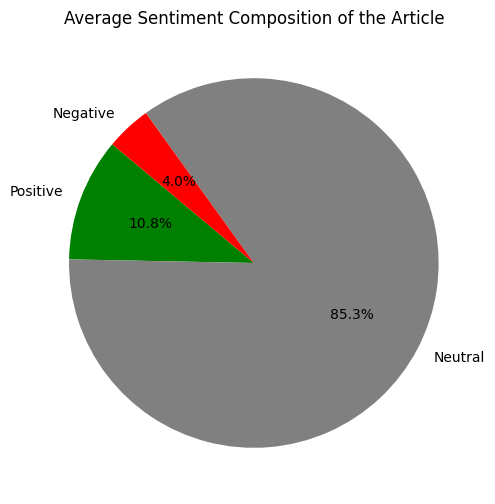

In [ ]:

import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.tree import Tree
import matplotlib.pyplot as plt
from collections import Counter

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')


# Step 1: Web Scraping
url = "https://awealthofcommonsense.com/2024/11/talk-your-book-22/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Text Extraction
# Extract all paragraph texts
paragraphs = soup.find_all('p')
text = ' '.join(paragraph.get_text() for paragraph in paragraphs)

# Step 3: Text Processing and Named Entity Recognition
# 1. Tokenization
sentences = sent_tokenize(text)
tokens = [word_tokenize(sentence) for sentence in sentences]

# 2. Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in sentence if token.lower() not in stop_words] for sentence in tokens]

# Flatten the list of filtered tokens for frequency analysis
flattened_tokens = [token for sublist in filtered_tokens for token in sublist]

# Get the most common words after stopwords removal
word_counter = Counter(flattened_tokens)
most_common_words = word_counter.most_common(10)

# 3. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in sentence] for sentence in filtered_tokens]

# 4. Parts-of-Speech Tagging
tagged_tokens = [pos_tag(sentence) for sentence in lemmatized_tokens]

# 5. Named Entity Recognition
ne_trees = [ne_chunk(tagged) for tagged in tagged_tokens]
named_entities = []
for tree in ne_trees:
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([token for token, pos in subtree.leaves()])
            named_entities.append((entity, subtree.label()))

# Extract entity names and their types
entity_names = [entity for entity, label in named_entities]
entity_types = [label for entity, label in named_entities]

# Count the frequency of each entity
entity_counter = Counter(entity_names)

# Step 4: Lexicon-Based Sentiment Analysis
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence in the text
sentiment_results = {'sentence': [], 'positive': [], 'neutral': [], 'negative': [], 'compound': []}
for sentence in sentences:
    sentiment = sid.polarity_scores(sentence)
    sentiment_results['sentence'].append(sentence)
    sentiment_results['positive'].append(sentiment['pos'])
    sentiment_results['neutral'].append(sentiment['neu'])
    sentiment_results['negative'].append(sentiment['neg'])
    sentiment_results['compound'].append(sentiment['compound'])

# Display average sentiment scores across the text
average_positive = sum(sentiment_results['positive']) / len(sentiment_results['positive'])
average_neutral = sum(sentiment_results['neutral']) / len(sentiment_results['neutral'])
average_negative = sum(sentiment_results['negative']) / len(sentiment_results['negative'])
average_compound = sum(sentiment_results['compound']) / len(sentiment_results['compound'])

print("Average Sentiment Scores:")
print(f"Positive: {average_positive:.2f}")
print(f"Neutral: {average_neutral:.2f}")
print(f"Negative: {average_negative:.2f}")
print(f"Compound: {average_compound:.2f}")

# Step 5: Visualization of Named Entities
most_common_entities = entity_counter.most_common(10)
entities, counts = zip(*most_common_entities)


# Step 2: Text Extraction
# Extract all paragraph texts
paragraphs = soup.find_all('p')
text = ' '.join(paragraph.get_text() for paragraph in paragraphs)

# Step 3: Text Processing and Named Entity Recognition
# 1. Tokenization
sentences = sent_tokenize(text)
tokens = [word_tokenize(sentence) for sentence in sentences]

# 2. Stopwords Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in sentence if token.lower() not in stop_words] for sentence in tokens]

# Flatten the list of filtered tokens for frequency analysis
flattened_tokens = [token for sublist in filtered_tokens for token in sublist]

# Get the most common words after stopwords removal
word_counter = Counter(flattened_tokens)
most_common_words = word_counter.most_common(10)

# 3. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in sentence] for sentence in filtered_tokens]

# 4. Parts-of-Speech Tagging
tagged_tokens = [pos_tag(sentence) for sentence in lemmatized_tokens]

# 5. Named Entity Recognition
ne_trees = [ne_chunk(tagged) for tagged in tagged_tokens]
named_entities = []
for tree in ne_trees:
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([token for token, pos in subtree.leaves()])
            named_entities.append((entity, subtree.label()))

# Extract entity names and their types
entity_names = [entity for entity, label in named_entities]
entity_types = [label for entity, label in named_entities]

# Count the frequency of each entity
entity_counter = Counter(entity_names)

print("Most Common Words After Stopwords Removal:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Step 4: Lexicon-Based Sentiment Analysis
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence in the text
sentiment_results = {'sentence': [], 'positive': [], 'neutral': [], 'negative': [], 'compound': []}
for sentence in sentences:
    sentiment = sid.polarity_scores(sentence)
    sentiment_results['sentence'].append(sentence)
    sentiment_results['positive'].append(sentiment['pos'])
    sentiment_results['neutral'].append(sentiment['neu'])
    sentiment_results['negative'].append(sentiment['neg'])
    sentiment_results['compound'].append(sentiment['compound'])

# Display average sentiment scores across the text
average_positive = sum(sentiment_results['positive']) / len(sentiment_results['positive'])
average_neutral = sum(sentiment_results['neutral']) / len(sentiment_results['neutral'])
average_negative = sum(sentiment_results['negative']) / len(sentiment_results['negative'])
average_compound = sum(sentiment_results['compound']) / len(sentiment_results['compound'])

print("Average Sentiment Scores:")
print(f"Positive: {average_positive:.2f}")
print(f"Neutral: {average_neutral:.2f}")
print(f"Negative: {average_negative:.2f}")
print(f"Compound: {average_compound:.2f}")

# Step 5: Visualization of Named Entities
most_common_entities = entity_counter.most_common(10)
entities, counts = zip(*most_common_entities)

plt.figure(figsize=(10, 6))
plt.barh(entities, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Named Entities in the Article')
plt.gca().invert_yaxis()
plt.show()

# Optional: Visualize sentiment composition (average scores)
labels = ['Positive', 'Neutral', 'Negative']
sizes = [average_positive, average_neutral, average_negative]
colors = ['green', 'gray', 'red']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Average Sentiment Composition of the Article')
plt.show()


**Interpretation:**

**Neutral Tone:**

The high neutral score (85.3%) indicates that the article is largely factual and informative, likely providing a balanced and objective discussion on financial topics without a strong positive or negative sentiment.

**Mildly Positive Sentiment:**

With a compound score of 0.25 and a positive score of 0.11, the article may have a slightly positive tone, potentially indicating a favorable view of the financial products or strategies discussed.

**Low Negative Sentiment: **

The minimal negative sentiment (4%) suggests that there is little criticism or negative language, supporting the notion that the article maintains a professional, neutral stance.

The sentiment analysis shows a predominantly neutral tone with slight positivity, which is common in professional financial writing where the intent is to inform rather than persuade emotionally.

In [ ]:
# for the above code generate the above code for embeddings using Word2vector

